In [1]:
library(reticulate)
use_python("/opt/conda/bin/python3.10",required=T)
py_config()
library(rhdf5)
library(Seurat)
library(ggplot2)
library(dplyr)
library(spatialLIBD)
source('BEER/BEER.R')

python:         /opt/conda/bin/python3.10
libpython:      /opt/conda/lib/libpython3.10.so
pythonhome:     /opt/conda:/opt/conda
version:        3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
numpy:          /opt/conda/lib/python3.10/site-packages/numpy
numpy_version:  1.22.4

NOTE: Python version was forced by use_python function

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SpatialExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs

[1] "Welcome to BEER (v0.1.9)!"


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
getwd()

[1] "/workspace/spatial_integration"

In [3]:
# D1=readRDS('/home/spatial_integration/spatialLIBD/r_lib/assay_151507.rds')
# D2=readRDS('spatialLIBD/r_lib/assay_151672.rds')
# D3=readRDS('spatialLIBD/r_lib/assay_151673.rds')

# BATCH=c(rep('D1',ncol(D1)),
#         rep('D2',ncol(D2)),
#         rep('D3',ncol(D3)) )

# D12=.simple_combine(D1,D2)$combine
# D123=.simple_combine(D12,D3)$combine

# DATA = D123

# rm(D1);rm(D2);rm(D3);rm(D12)

In [5]:
D1=readRDS('dataset/df_logcount_507.rds')
D2=readRDS('dataset/df_logcount_507.rds')
D3=readRDS('dataset/df_logcount_507.rds')
DATA = read.csv('dataset/datapoints/embed_all.csv')

In [13]:
D1=readRDS('dataset/df_logcount_507.rds')
D2=readRDS('dataset/df_logcount_672.rds')
D3=readRDS('dataset/df_logcount_673.rds')

In [14]:
BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)) )

In [15]:
D1

,AAACAACGAATAGTTC-1,AAACAAGTATCTCCCA-1,AAACAATCTACTAGCA-1,AAACACCAATAACTGC-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCACTACACAGAT-1,AAACCCGAACGAAATC-1,⋯,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTCTAGATACGCT-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTGTAAATTC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000237613,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000186092,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000238009,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000239945,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000239906,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000241599,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000236601,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0
ENSG00000284733,0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0,0.0000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0


In [16]:
D2

,AAACAAGTATCTCCCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACATTTCCCGGATT-1,AAACCACTACACAGAT-1,AAACCCGAACGAAATC-1,AAACCGGAAATGTTAA-1,AAACCGGGTAGGTACC-1,⋯,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTCTAGATACGCT-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTGTAAATTC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000237613,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000186092,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000238009,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000239945,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000239906,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000241599,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000236601,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000
ENSG00000284733,0.0000000,0.00000,0.000000,0,0.000000,0,0.0000000,0.000000,0.0000000,0.000000,⋯,0,0,0.0000000,0.0000000,0,0,0,0,0.000000,0.0000000


In [17]:
D3

,AAACAAGTATCTCCCA-1,AAACAATCTACTAGCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCCGAACGAAATC-1,AAACCGGGTAGGTACC-1,⋯,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTATTACACG-1,TTGTTTGTGTAAATTC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000237613,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000186092,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000238009,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000239945,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000239906,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000241599,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000236601,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
ENSG00000284733,0.0000000,0.00000,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000


In [18]:
DATA

AAACAACGAATAGTTC.1,AAACAAGTATCTCCCA.1,AAACAATCTACTAGCA.1,AAACACCAATAACTGC.1,AAACAGCTTTCAGAAG.1,AAACAGGGTCTATATT.1,AAACAGTGTTCCTGGG.1,AAACATTTCCCGGATT.1,AAACCACTACACAGAT.1,AAACCCGAACGAAATC.1,⋯,TTGTGTATGCCACCAA.1.2,TTGTGTTTCCCGAAAG.1.2,TTGTTAGCAAATTCGA.1.2,TTGTTCAGTGTGCTAC.1.2,TTGTTGTGTGTCAAGA.1.2,TTGTTTCACATCCAGG.1.2,TTGTTTCATTAGTCTA.1.2,TTGTTTCCATACAACT.1.2,TTGTTTGTATTACACG.1,TTGTTTGTGTAAATTC.1.2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000
0.000000,0.0000000,0,0.000000,0.000000,0,0,0.0000000,0,0,⋯,0.000000,0.000000,0,0.0000000,0,0,0.000000,0.000000,0.000000,0.0000000


In [19]:
length(BATCH)

[1] 11880

In [20]:
dim(D1)
dim(D2)
dim(D3)
dim(DATA)

[1] 33538  4226

[1] 33538  4015

[1] 33538  3639

[1] 54776 11880

In [21]:
mybeer=BEER(DATA, BATCH, GNUM=50, PCNUM=100, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

[1] "BEER start!"
[1] "2023-06-28 14:49:28 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 50
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"
[1] 2
[1] "D2"
[1] 3
[1] "D3"
[1] "Total varible gene number (GN) is:"
[1] 2636


Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  27727 
Negative:  29314 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:52:45 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

14:52:45 Read 11880 rows and found 100 numeric columns

14:52:45 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

14:52:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 50
[1] "Finding MN pairs..."
[1] "1 / 150"
[1] "101 / 150"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 8
[1] "Evaluating PCs ..."
[1] "Start"


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 1


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 2


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 3


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 4


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 5


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 6


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 7


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 8


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 9


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 10


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 11


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 12


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 13


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 14


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 15


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 16


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 17


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 18


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 19


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 20


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 21


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 22


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 23


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 24


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 25


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 26


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 27


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 28


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 29


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 30


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 31


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 32


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 33


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 34


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 35


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 36


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 37


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 38


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 39


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 40


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 41


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 42


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 43


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 44


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 45


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 46


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 47


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 48


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 49


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 50


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 51


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 52


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 53


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 54


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 55


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 56


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 57


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 58


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 59


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 60


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 61


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 62


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 63


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 64


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 65


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 66


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 67


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 68


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 69


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 70


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 71


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 72


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 73


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 74


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 75


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 76


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 77


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 78


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 79


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 80


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 81


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 82


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 83


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 84


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 85


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 86


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 87


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 88


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 89


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 90


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 91


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 92


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 93


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 94


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 95


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 96


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 97


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 98


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 99


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 100
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2023-06-28 14:53:52 KST"


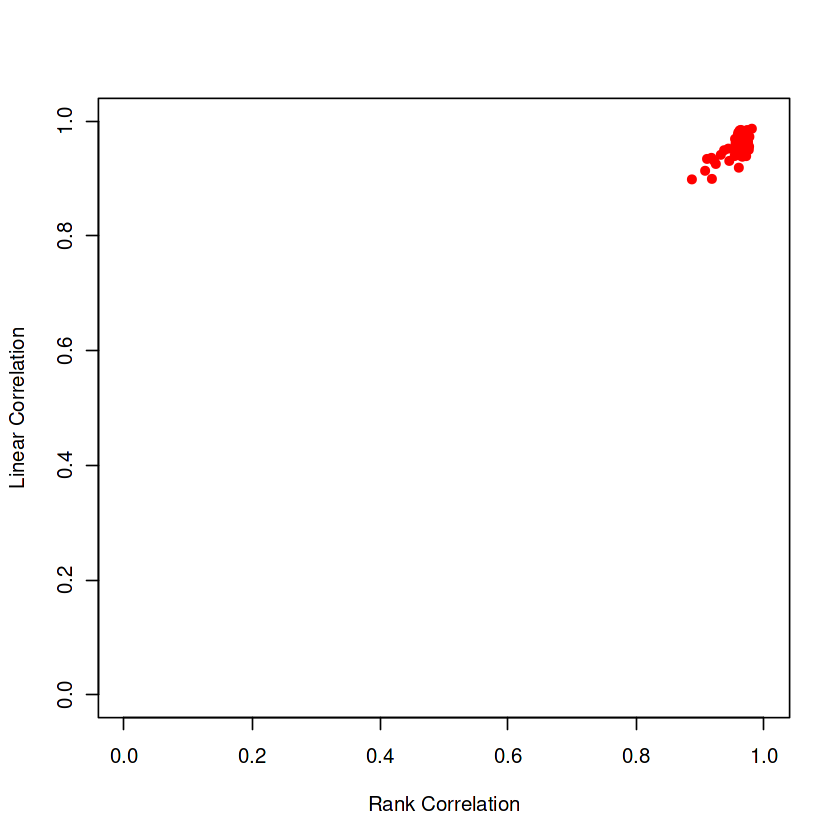

In [22]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [30]:
png('corr_plot_0628.png')
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))
dev.off()

png 
  2

Warning message:
"Non-unique cell names (colnames) present in the input matrix, making unique"
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000197971 
Negative:  ENSG00000133392 



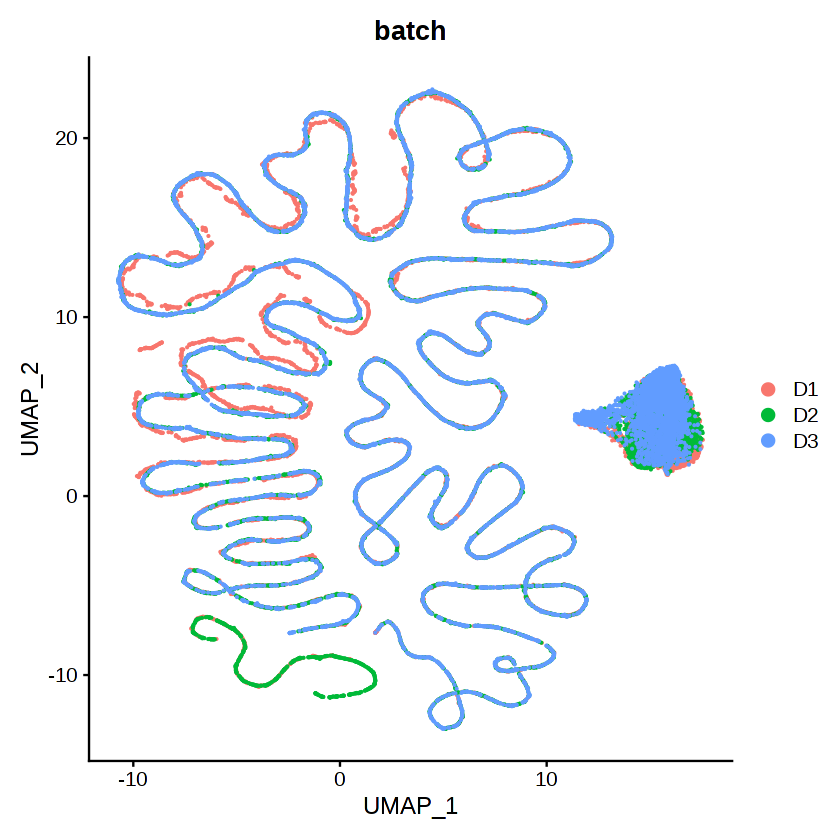

In [47]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Centering and scaling data matrix

PC_ 1 
Positive:  27771 
Negative:  27163 



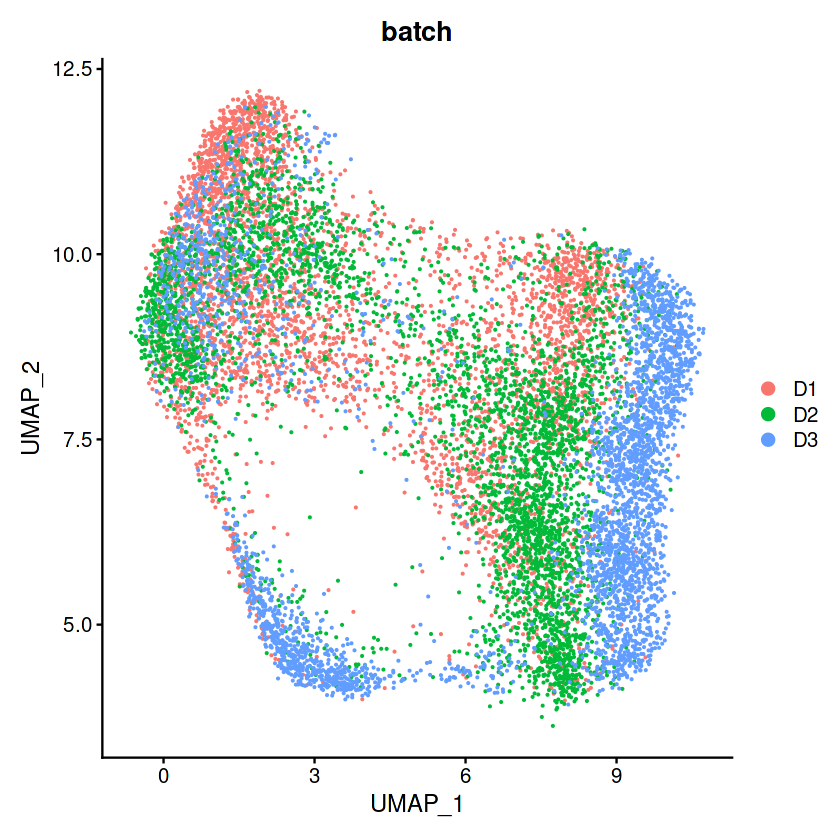

In [23]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [24]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1)
ggsave('umap_plot_baserow_0628.png',plot_save)

Saving 6.67 x 6.67 in image


Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000187094 
Negative:  ENSG00000168314 



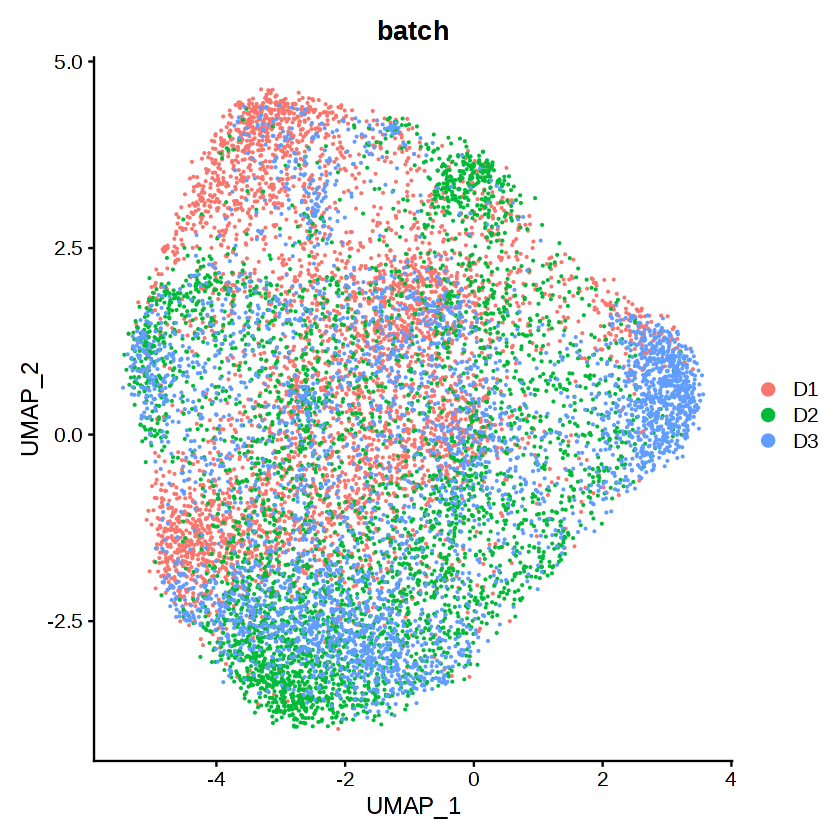

In [19]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

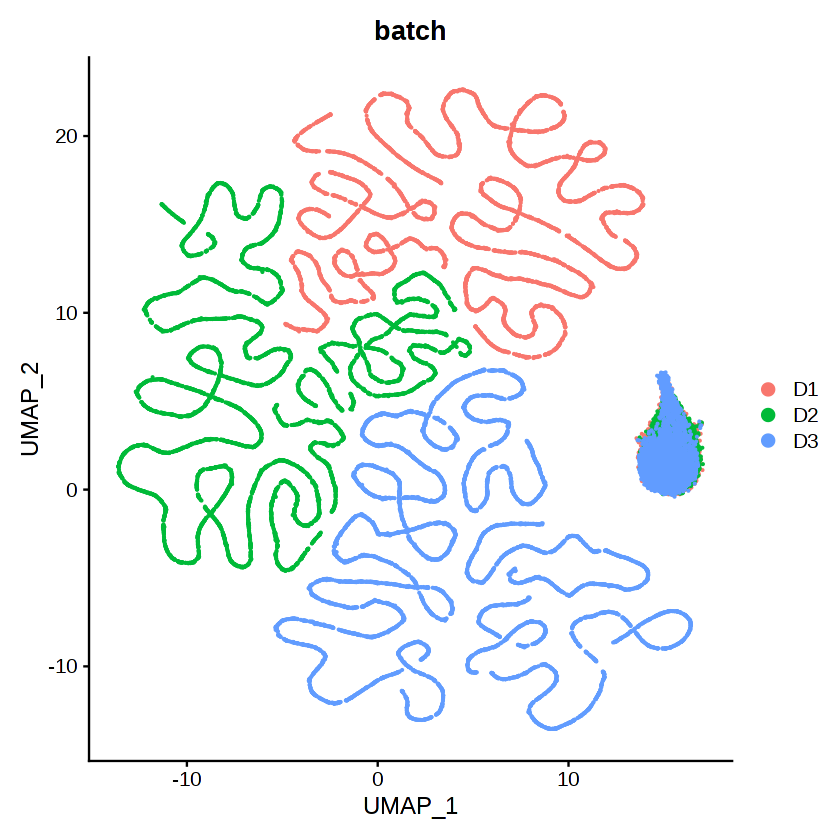

In [49]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

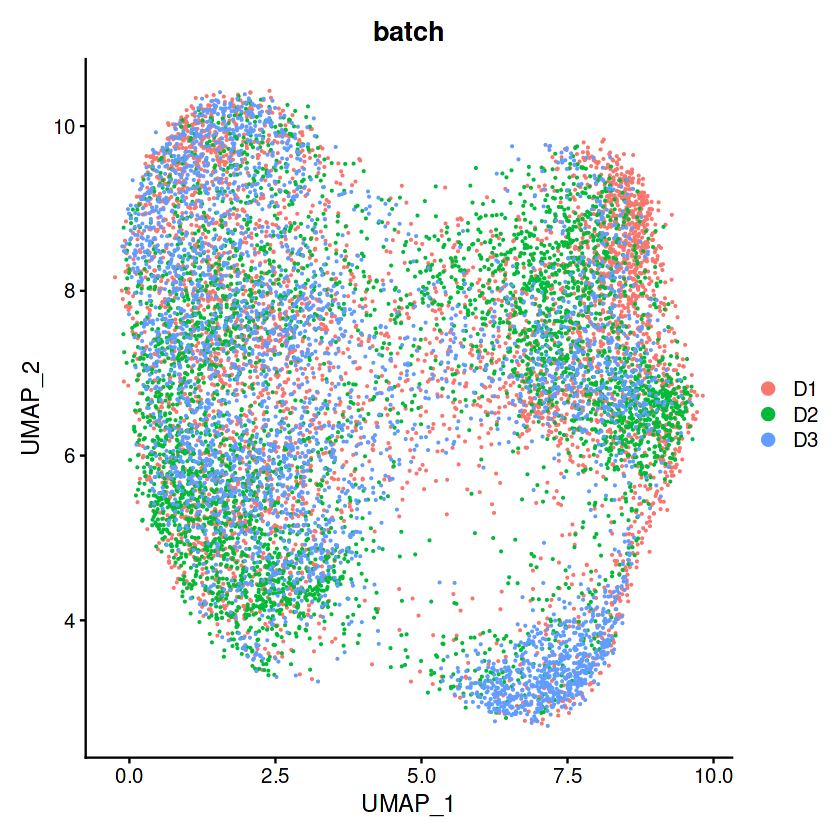

In [25]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [26]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 
ggsave('umap_plot_gg_0628.png',umap_plot)

Saving 6.67 x 6.67 in image


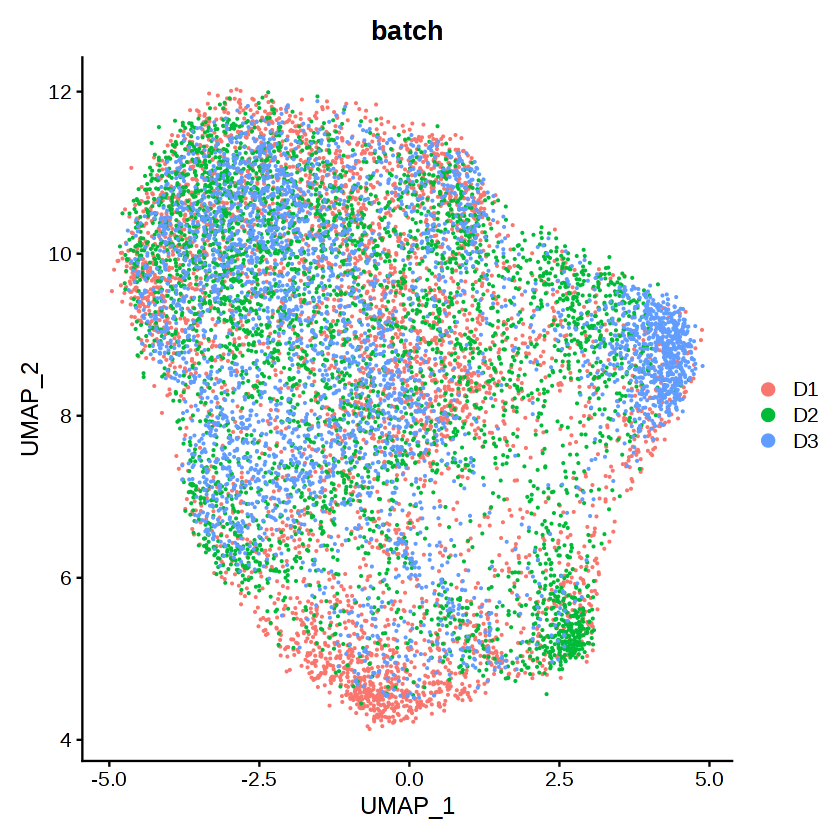

In [20]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [24]:
# library(ggplot2)
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  
ggsave('umap_plot_gg.png',umap_plot)

ERROR: Error in ggsave("umap_plot_gg.png", umap_plot): could not find function "ggsave"


In [2]:
D1=readRDS('demo_BEER/MGH36.RDS')
D2=readRDS('demo_BEER/MGH53.RDS')
D3=readRDS('demo_BEER/MGH54.RDS')
D4=readRDS('demo_BEER/MGH60.RDS')
D5=readRDS('demo_BEER/MGH93.RDS')
D6=readRDS('demo_BEER/MGH97.RDS')

BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)),
        rep('D4',ncol(D4)),
        rep('D5',ncol(D5)),
        rep('D6',ncol(D6)) )
        
D12=.simple_combine(D1,D2)$combine
D34=.simple_combine(D3,D4)$combine
D56=.simple_combine(D5,D6)$combine
D1234=.simple_combine(D12,D34)$combine
D123456=.simple_combine(D1234,D56)$combine

DATA=D123456   

# rm(D1);rm(D2);rm(D3);rm(D4);rm(D5);rm(D6)
# rm(D12);rm(D34);rm(D56);rm(D1234);rm(D123456)

[1] "BEER start!"
[1] "2023-03-09 15:55:44 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 2
[1] "D2"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 3
[1] "D3"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 4
[1] "D4"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 5
[1] "D5"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 6
[1] "D6"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "Total varible gene number (GN) is:"
[1] 4554


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Found 991 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found6batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  BCAN 
Negative:  C1QC 



[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D4"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D5"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D6"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 180"
[1] "101 / 180"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 34
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "###################

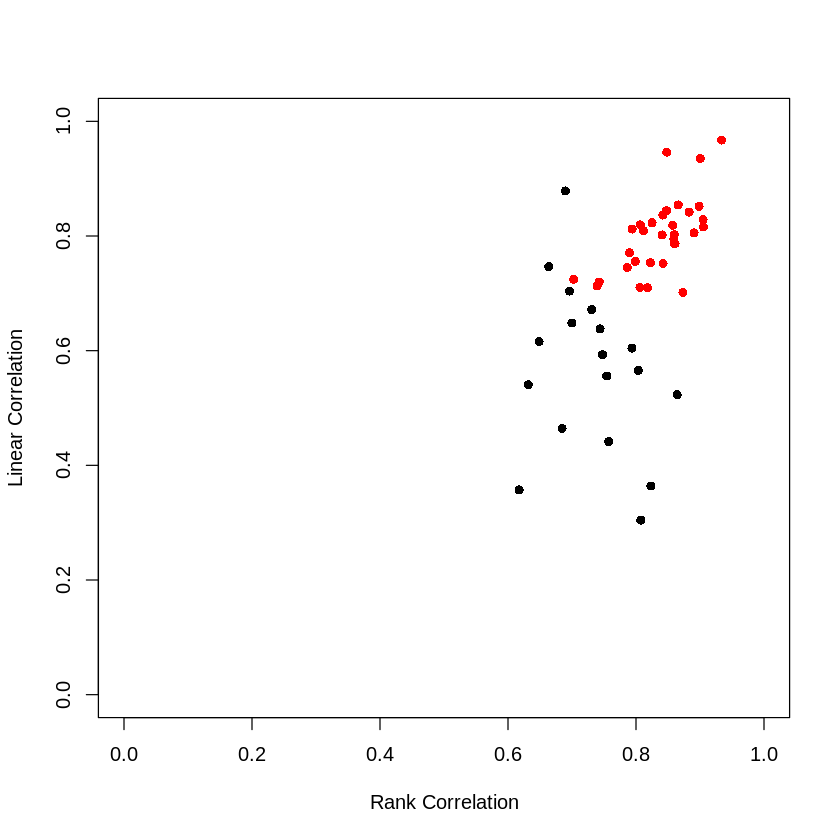

In [3]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

# Check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  LAPTM5 
Negative:  BCAN 



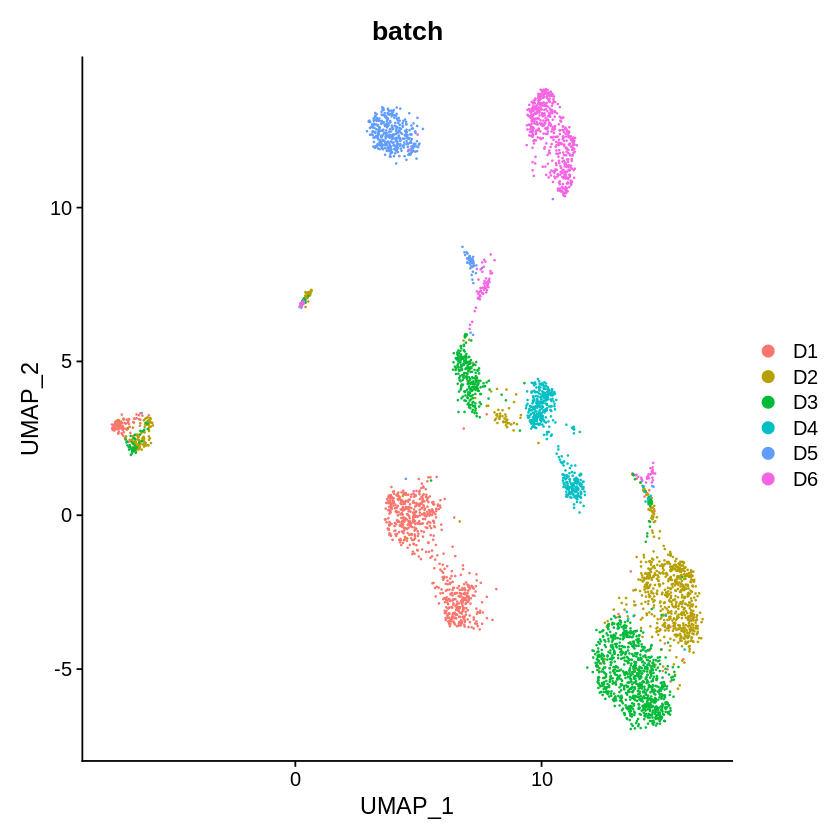

In [4]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

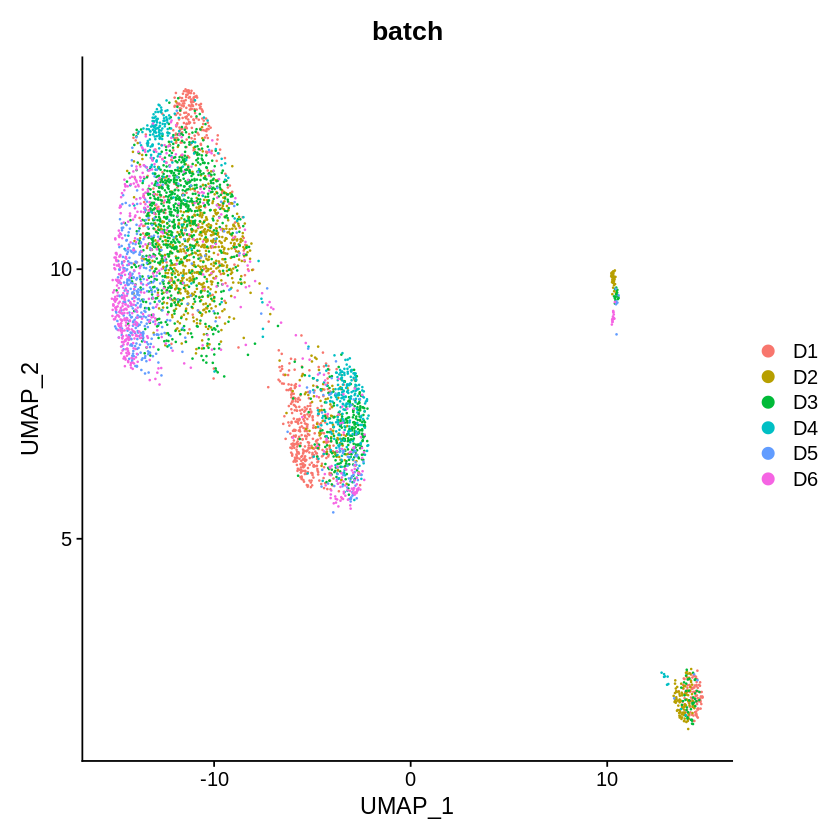

In [5]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

Warning message:
“The following arguments are not used: check_duplicates”


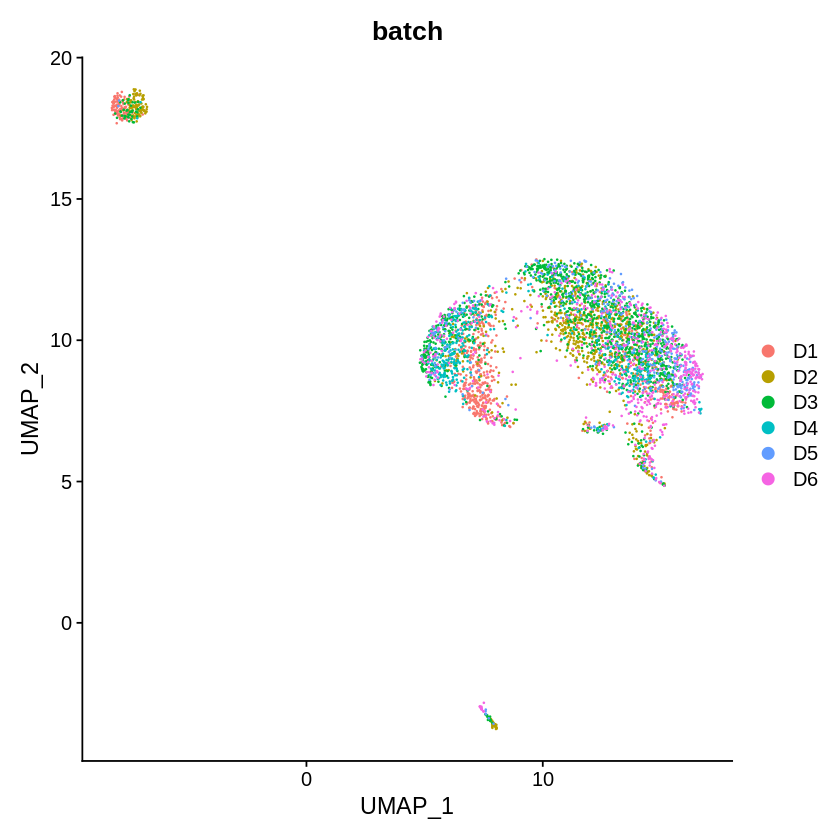

In [6]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [ ]:
D1 <- read.table("demo_BEER/DATA1_MAT.txt", sep='\t', row.names=1, header=T)
D2 <- read.table("demo_BEER/DATA2_MAT.txt", sep='\t', row.names=1, header=T)

In [ ]:
colnames(D1)=paste0('D1_', colnames(D1))
colnames(D2)=paste0('D2_', colnames(D2))

DATA=.simple_combine(D1,D2)$combine

BATCH=rep('D2',ncol(DATA))
BATCH[c(1:ncol(D1))]='D1'

In [ ]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL) 

In [ ]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [ ]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [ ]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 